In [1]:
from fastai.vision.all import *
from fastai.vision.models.all import *
import numpy as np

np.random.seed(1)
path = Path(r'../input/cat-dog-breedz/train_1')
data = ImageDataLoaders.from_folder(path, valid_pct = 0.2, bs = 16, batch_tfms=Normalize.from_stats(*imagenet_stats), item_tfms=Resize(224,224))


In [2]:
# learn = vision_learner(data,vgg16_bn, metrics=accuracy, model_dir= '/kaggle/working/models')

In [3]:
ConvLayer??

Init signature:
ConvLayer(
    ni,
    nf,
    ks=3,
    stride=1,
    padding=None,
    bias=None,
    ndim=2,
    norm_type=<NormType.Batch: 1>,
    bn_1st=True,
    act_cls=<class 'torch.nn.modules.activation.ReLU'>,
    transpose=False,
    init='auto',
    xtra=None,
    bias_std=0.01,
    *,
    dilation: Union[int, Tuple[int, int]] = 1,
    groups: int = 1,
    padding_mode: str = 'zeros',
    device=None,
    dtype=None,
)
Source:        
class ConvLayer(nn.Sequential):
    "Create a sequence of convolutional (`ni` to `nf`), ReLU (if `use_activ`) and `norm_type` layers."
    @delegates(nn.Conv2d)
    def __init__(self, ni, nf, ks=3, stride=1, padding=None, bias=None, ndim=2, norm_type=NormType.Batch, bn_1st=True,
                 act_cls=defaults.activation, transpose=False, init='auto', xtra=None, bias_std=0.01, **kwargs):
        if padding is None: padding = ((ks-1)//2 if not transpose else 0)
        bn = norm_type in (NormType.Batch, NormType.BatchZero)
        inn = norm_

In [4]:
"""
Init signature:
nn.Conv2d(
    in_channels: int,
    out_channels: int,
    kernel_size: Union[int, Tuple[int, int]],
    stride: Union[int, Tuple[int, int]] = 1,
    padding: Union[str, int, Tuple[int, int]] = 0,
    dilation: Union[int, Tuple[int, int]] = 1,
    groups: int = 1,
    bias: bool = True,
    padding_mode: str = 'zeros',
    device=None,
    dtype=None,
) -> None
"""

"\nInit signature:\nnn.Conv2d(\n    in_channels: int,\n    out_channels: int,\n    kernel_size: Union[int, Tuple[int, int]],\n    stride: Union[int, Tuple[int, int]] = 1,\n    padding: Union[str, int, Tuple[int, int]] = 0,\n    dilation: Union[int, Tuple[int, int]] = 1,\n    groups: int = 1,\n    bias: bool = True,\n    padding_mode: str = 'zeros',\n    device=None,\n    dtype=None,\n) -> None\n"

In [5]:
def model():
    return nn.Sequential(
    nn.Conv2d(3,16,3),
#     ResBlock(16),
    nn.AdaptiveAvgPool2d(1),                                   
    nn.AdaptiveMaxPool2d(1),
    Flatten(),                                                    
    nn.BatchNorm1d(16),
    nn.Dropout(0.25),
    nn.Linear(16,12)

    )



In [6]:
learn = Learner(data, model(), loss_func=CrossEntropyLossFlat(),model_dir= '/kaggle/working/models',
                metrics=[accuracy], cbs=[ActivationStats(with_hist=True),MixedPrecision,FP16TestCallback])

In [7]:
# !rm models/ -r

In [8]:
learn.summary()

/opt/conda/lib/python3.7/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (modules) that exists in the learner. Use `self.learn.modules` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


Sequential (Input shape: 16 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 16 x 222 x 222 
Conv2d                                    448        True      
____________________________________________________________________________
                     16 x 16 x 1 x 1     
AdaptiveAvgPool2d                                              
AdaptiveMaxPool2d                                              
____________________________________________________________________________
                     16 x 16             
Flatten                                                        
BatchNorm1d                               32         True      
Dropout                                                        
____________________________________________________________________________
                     16 x 12             
Linear                                    204        True      
____________________________________________

SuggestedLRs(valley=0.005248074419796467)

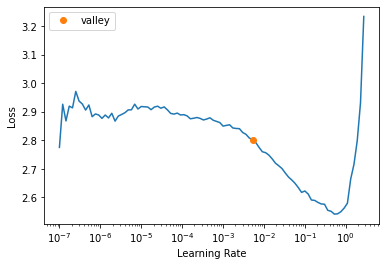

In [9]:
learn.lr_find()

In [10]:
learn.fit_one_cycle(3, 0.12022644281387329, cbs=[ EarlyStoppingCallback(monitor='valid_loss', min_delta=0.1, patience=3)])



epoch,train_loss,valid_loss,accuracy,time
0,2.330469,2.220829,0.241229,07:53
1,2.239913,2.173583,0.216385,07:27
2,2.162327,2.106079,0.263228,07:49


In [ ]:
learn.fit_one_cycle(4, lr_max = slice(1e-04, 0.12022644281387329),
                    cbs=[ EarlyStoppingCallback(monitor='valid_loss', min_delta=0.1, patience=3)])

epoch,train_loss,valid_loss,accuracy,time
